In [48]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import os
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

In [49]:
import plotting
import bivariate_plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [51]:
#data = pd.read_csv("hotspot_vind_censustract.csv")

data = gpd.read_file("outputs/hotspot_vind_censustract_wc.geojson")


In [53]:
data = data.rename(columns={
    'RPL_THEMES': 'y'})

In [54]:
data['y']=data['y']*100

In [55]:
# Round the results
data['y'] = data['y'].round()

In [56]:
# Cast to integer
data['y'] = data['y'].astype('Int64')

In [30]:
# gdf = gpd.read_file("data/esri/FIPSMapping.gdb")
# gdf.FIPS_1 = gdf['FIPS_1'].astype(int)
# data = gdf.merge(data, left_on="FIPS_1", right_on="FIPS")

In [58]:
hspts = plotting.get_hotspot_list()

In [77]:
# Custom colormap
colors = bivariate_plotting.color_sets["pink-blue"]
cmap = ListedColormap(colors)

colors_reversed = colors[::-1]  # This reverses the list

# Now create the reversed colormap
cmap_reversed = ListedColormap(colors_reversed)

In [60]:
# Only consider rows where 'y' is not NaN
data_y_not_nan = data[data['y'].notna()]

In [84]:
x = hspts[4]

In [85]:
x

'hw'

In [96]:
import matplotlib.colors as mcolors
# Normalize your values to the range [0, 1]
norm = mcolors.Normalize(vmin=0, vmax=0) # As your range is 1 to 9

In [108]:
data_.cols

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18102    0.0
18103    0.0
18104    0.0
18105    0.0
18106    0.0
Name: cols, Length: 17963, dtype: float64

In [107]:
data_['cols'] = norm(data_['biv_bins'])


/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0, 0.5, 'Social Vunerability Index')

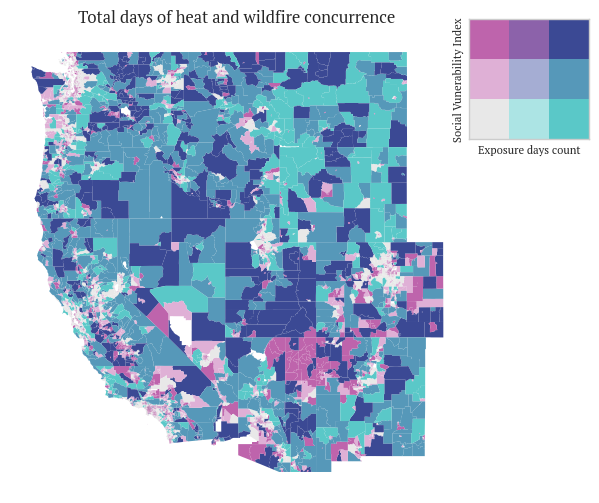

In [110]:
data_ = bivariate_plotting.prepare_df(data_y_not_nan, x=x, y="y")
fig, ax = plt.subplots(1, 1, figsize=(6,6))

# Now you can get a color for each value
# data_['cols'] = data_['biv_bins'].apply(lambda x: cmap(norm(x)))

# Assuming 'data' is a Geopandas dataframe
data_.plot(
    column="biv_bins",
    ax=ax,
    cmap=cmap,
    legend=False,
    linewidth=0,
    missing_kwds={"color": "lightgrey"},
)
wrapped_title = textwrap.fill(hs_dict[x]["title_map"], 50)
ax.set_title(wrapped_title, fontsize=12)
ax.set_axis_off()

# Add a second axes for the colorbar
ax2 = fig.add_axes([0.9, 0.7, 0.2, 0.2])
data1 = np.array(
    [
        [7, 8, 9],
        [4, 5, 6],
        [1, 2, 3],
    ]
)

# Use imshow to display the color square in the second axes
im = ax2.imshow(data1, cmap=cmap, aspect="auto")

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("Exposure days count", fontsize=8)
ax2.set_ylabel("Social Vunerability Index", fontsize=8)

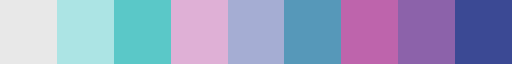

In [76]:
cmap

In [116]:
len(data_[["smoke_pm_non_zero","y","biv_bins"]][data_.biv_bins==4])

0

In [92]:
data_.biv_bins.max()

8

In [117]:
data_[["smoke_pm_non_zero","y","biv_bins","cols"]].head()

smoke_pm_non_zero   y  biv_bins  cols
0                406  80         6   0.0
1                437  92         6   0.0
2                411  84         8   0.0
3                421  95         6   0.0
4                346  97         6   0.0

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


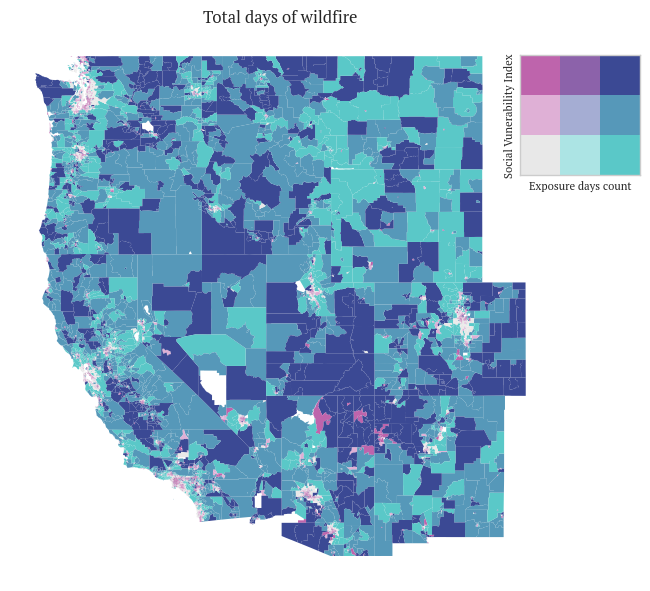

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


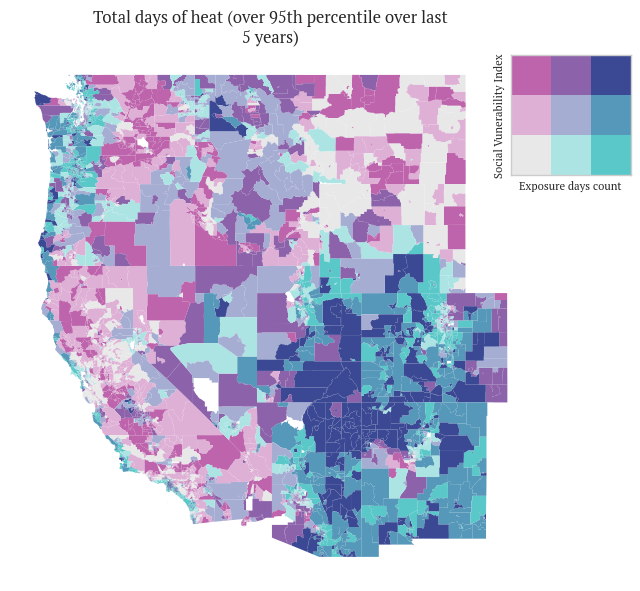

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


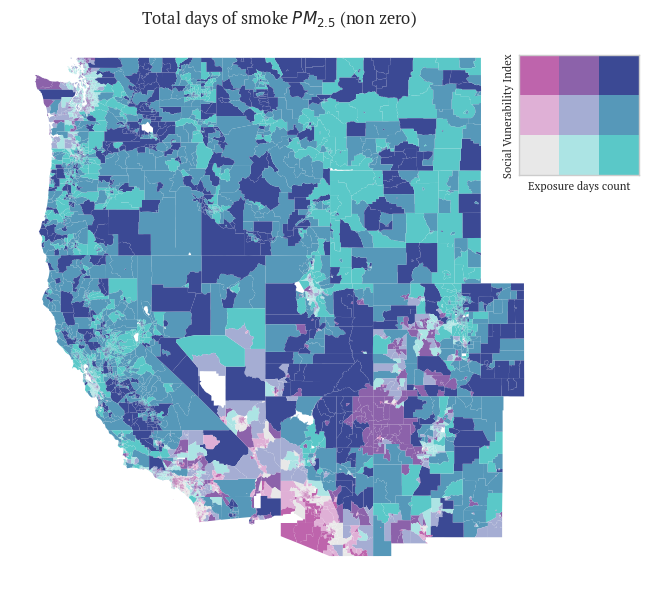

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


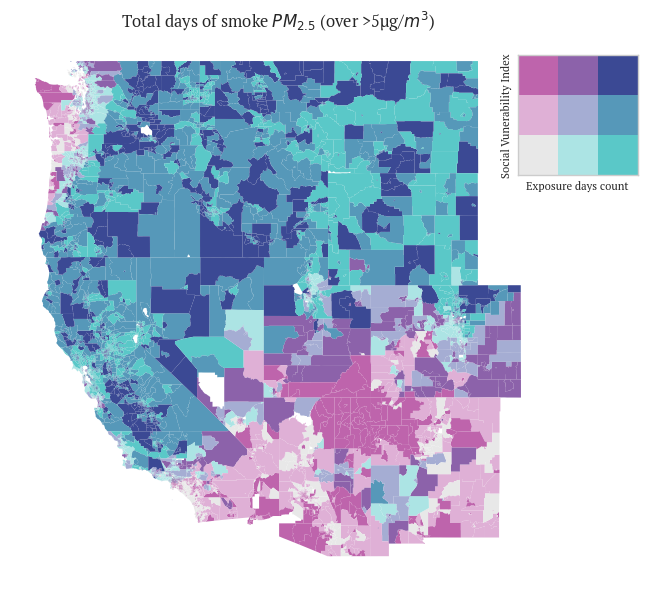

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


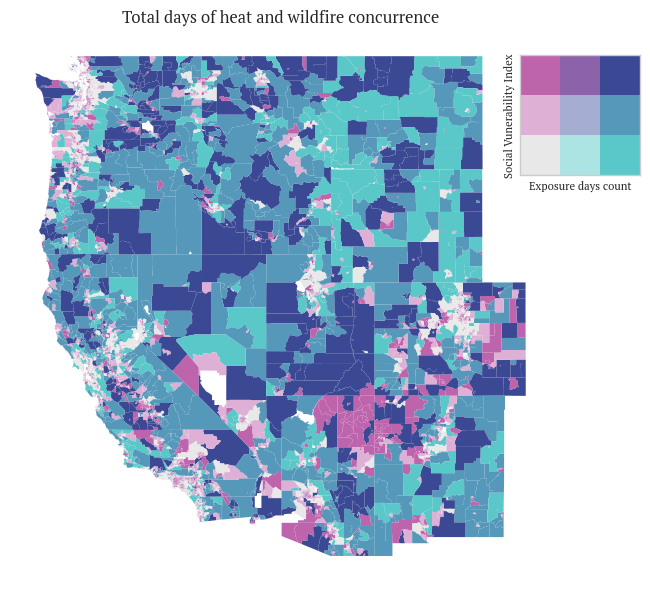

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


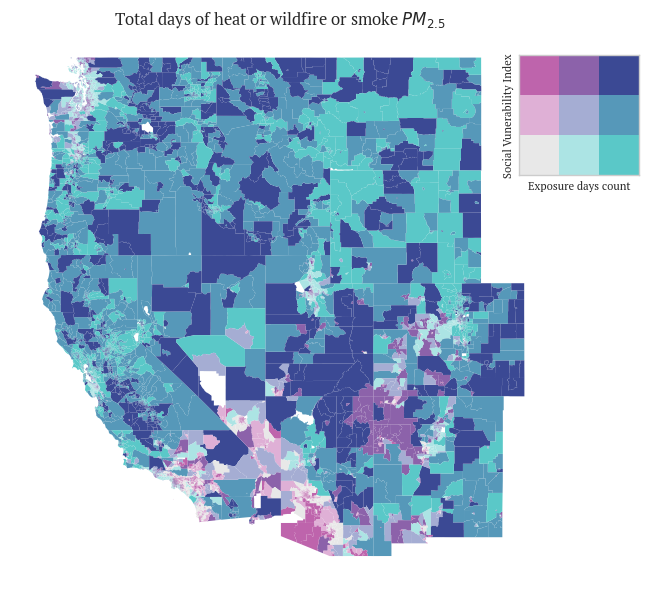

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


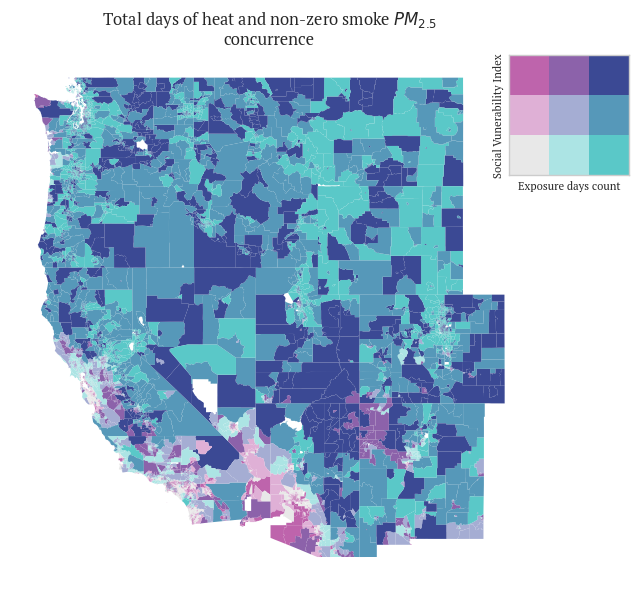

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


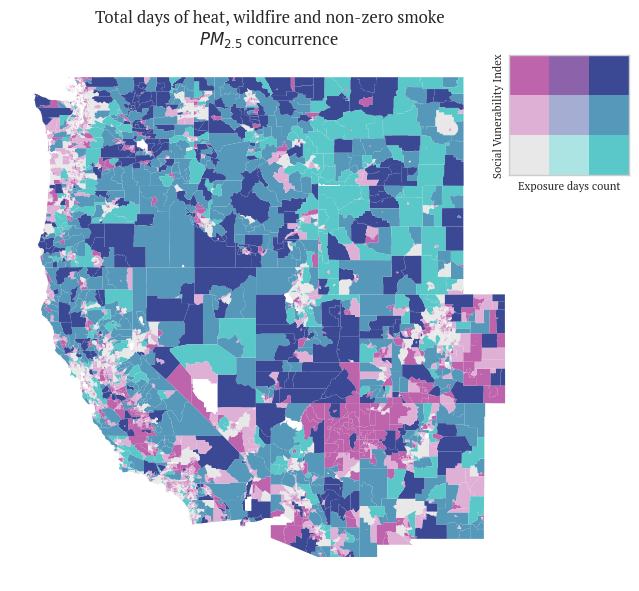

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


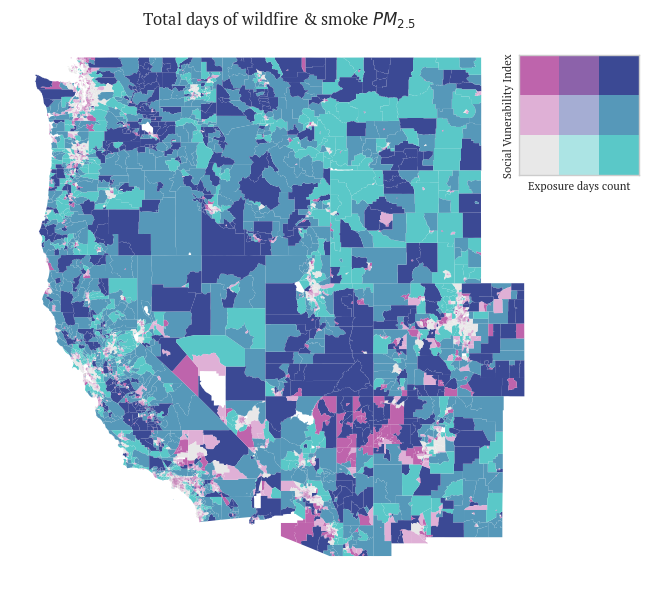

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


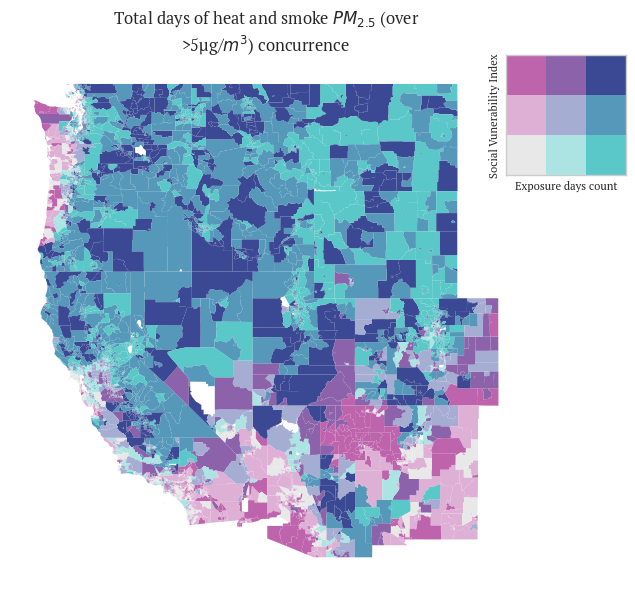

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


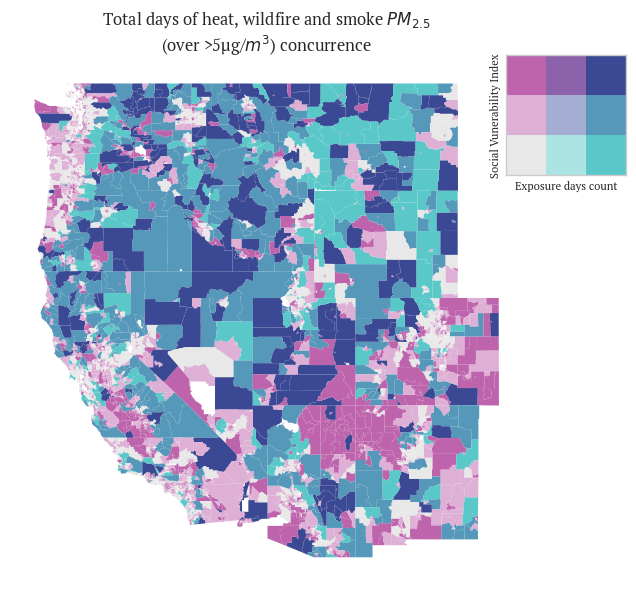

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


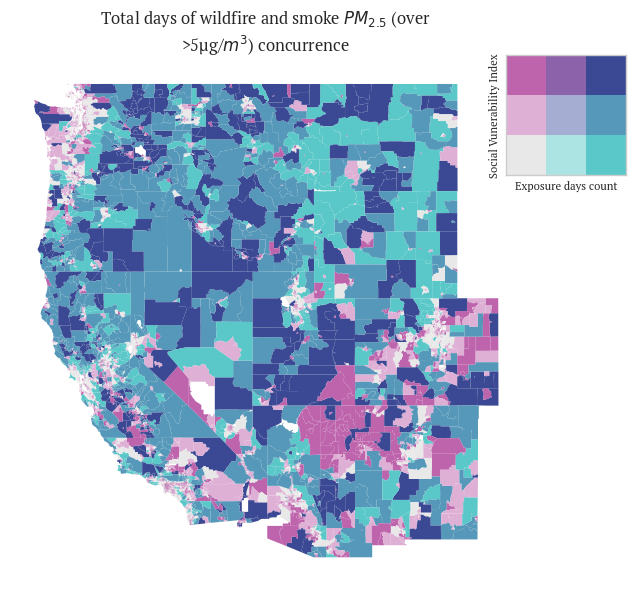

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


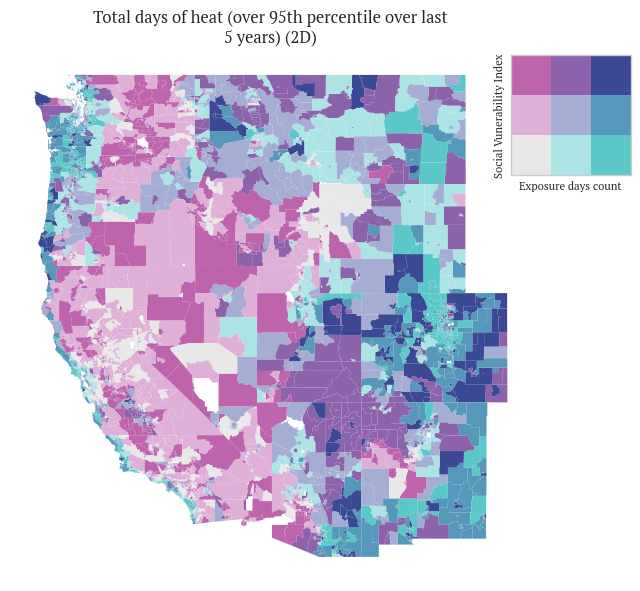

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


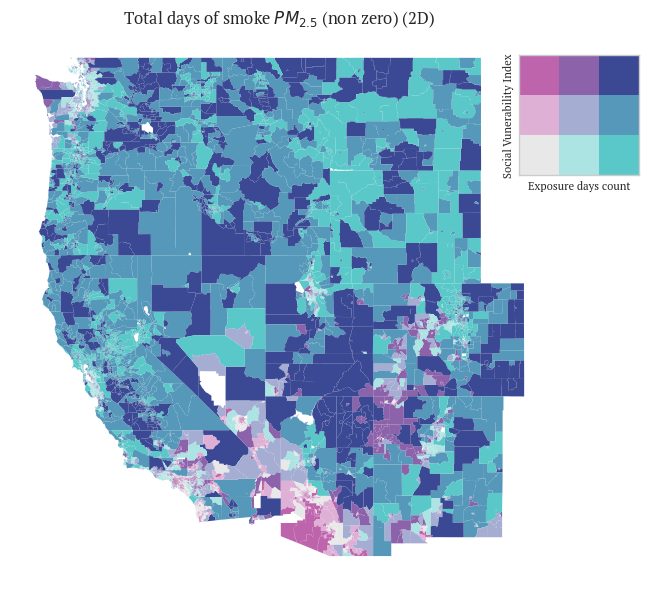

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


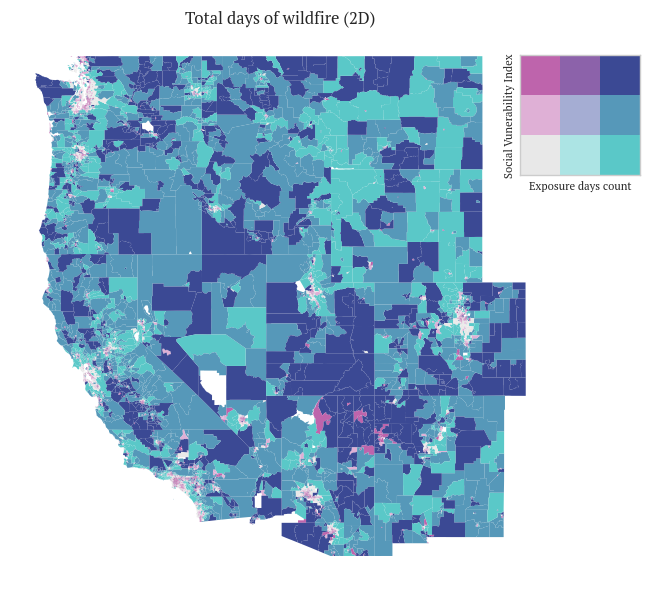

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


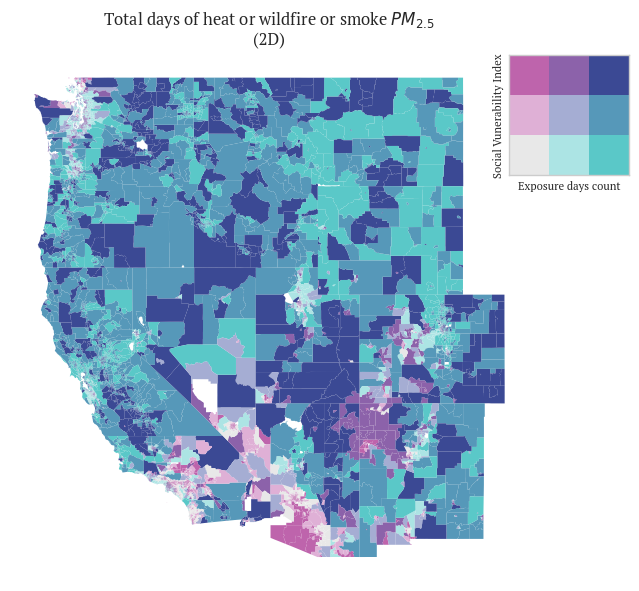

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


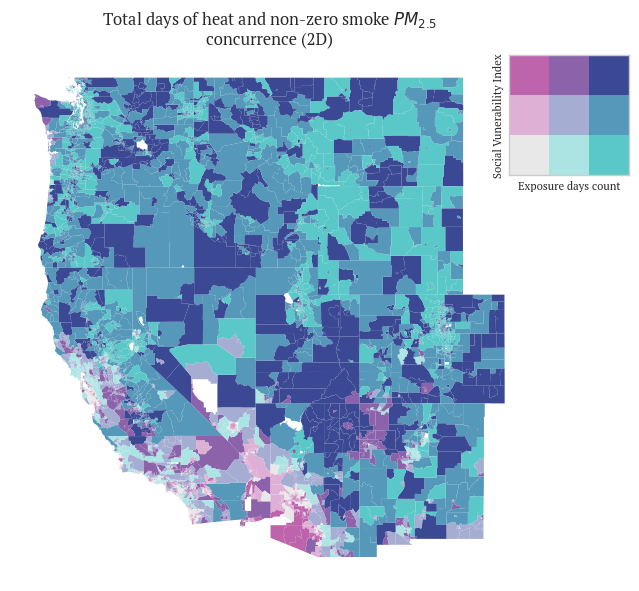

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


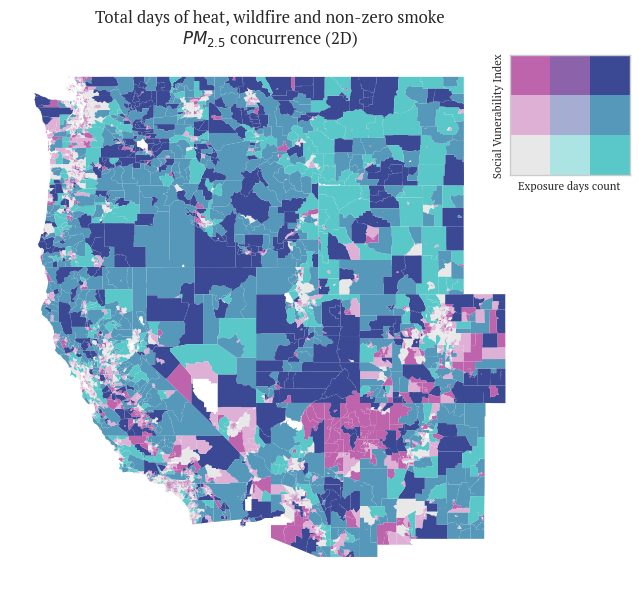

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_4000/1655953658.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


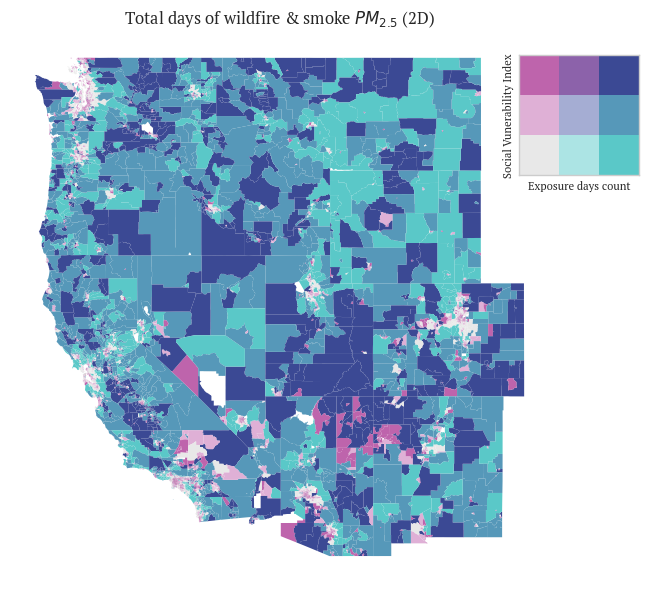

In [37]:
for x in hspts:
    data_ = bivariate_plotting.prepare_df(data_y_not_nan, x=x, y="y")
    fig, ax = plt.subplots(1, 1, figsize=(6,6))

    # Assuming 'data' is a Geopandas dataframe
    data_.plot(
        column="biv_bins",
        ax=ax,
        cmap=cmap,
        legend=False,
        linewidth=0,
        missing_kwds={"color": "lightgrey"},
    )
    wrapped_title = textwrap.fill(hs_dict[x]["title_map"], 50)
    ax.set_title(wrapped_title, fontsize=12)
    ax.set_axis_off()

    # Add a second axes for the colorbar
    ax2 = fig.add_axes([0.9, 0.7, 0.2, 0.2])
    data1 = np.array(
        [
            [7, 8, 9],
            [4, 5, 6],
            [1, 2, 3],
        ]
    )

    # Use imshow to display the color square in the second axes
    im = ax2.imshow(data1, cmap=cmap, aspect="auto")

    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xlabel("Exposure days count", fontsize=8)
    ax2.set_ylabel("Social Vunerability Index", fontsize=8)

    # Show the plot
    plt.tight_layout()
    plt.savefig("figures/bivariate_census_" + hs_dict[x]["title"] + "wc.png", bbox_inches='tight')
    plt.show()